In [50]:
import pandas as pd
import numpy as np
import os
import math
import graphlab
import graphlab as gl
import graphlab.aggregate as agg
from graphlab import SArray

In [2]:
'''钢炮'''
path = '/home/zongyi/bimbo_data/'

In [4]:
train = gl.SFrame.read_csv(path + 'train_lag5_w9_mean.csv', verbose=False)

In [4]:
town = gl.SFrame.read_csv(path + 'towns.csv', verbose=False)
train = train.join(town, on=['Agencia_ID','Producto_ID'], how='left')
train = train.fillna('t_c',1)
train = train.fillna('tcc',0)
train = train.fillna('tp_sum',0)
del train['Town']
del train['t_c']


In [5]:
del train['n_t']

In [6]:
del train['id']
del train['Venta_uni_hoy']
del train['Venta_hoy']
del train['Dev_uni_proxima']
del train['Dev_proxima']
del train['Demanda_uni_equil']


In [6]:
# relag_train = gl.SFrame.read_csv(path + 're_lag_train.csv', verbose=False)
# train = train.join(relag_train, on=['Cliente_ID','Producto_ID','Semana'], how='left')
# train = train.fillna('re_lag1',0)
# train = train.fillna('re_lag2',0)
# train = train.fillna('re_lag3',0)
# train = train.fillna('re_lag4',0)
# train = train.fillna('re_lag5',0)
# del relag_train


In [7]:
# pd = gl.SFrame.read_csv(path + 'products.csv', verbose=False)
# train = train.join(pd, on=['Producto_ID'], how='left')
# train = train.fillna('prom',0)
# train = train.fillna('weight',0)
# train = train.fillna('pieces',1)
# train = train.fillna('w_per_piece',0)
# train = train.fillna('healthy',0)
# train = train.fillna('drink',0)
# del train['brand']
# del train['NombreProducto']
# del pd

In [8]:
# client = gl.SFrame.read_csv(path + 'clients.csv', verbose=False)
# train = train.join(client, on=['Cliente_ID'], how='left')
# del client

In [9]:
# cluster = gl.SFrame.read_csv(path + 'prod_cluster.csv', verbose=False)
# cluster = cluster[['Producto_ID','cluster']]
# train = train.join(cluster, on=['Producto_ID'], how='left')

In [51]:
# del train['Canal_ID']
# del train['week_times']
# del train['Semana']
# del train['lag_sum']
# del train['prior_sum']

# train = train.fillna('lag1',0)
# train = train.fillna('lag2',0)
# train = train.fillna('lag3',0)
# train = train.fillna('lag4',0)
# train = train.fillna('lag5',0)
# # train = train.fillna('lag_sum',0)
# # train = train.fillna('prior_sum',0)
# train = train.fillna('n_a',0)
# train = train.fillna('n_r',0)
# train = train.fillna('n_c',0)
# train = train.fillna('n_p',0)
print train.column_names()
print len(train.column_names())

['Agencia_ID', 'Ruta_SAK', 'Cliente_ID', 'Producto_ID', 'Demada_log', 'lag1', 'lag2', 'lag3', 'lag4', 'lag5', 'n_a', 'n_r', 'n_c', 'n_p', 'mpca']
15


In [52]:
# Make a train-test split
# train_data, test_data = train.random_split(0.9,seed=543)

# Create a model.
model = gl.boosted_trees_regression.create(train, target='Demada_log',
                                           step_size=0.1,
                                           max_iterations=1200,
                                           max_depth = 10,
                                          metric='rmse',
                                          random_seed=461,
                                          column_subsample=0.7,
                                          row_subsample=0.85,
                                          validation_set=None,
                                          model_checkpoint_path=path,
                                          model_checkpoint_interval=1200)

#500       | 14060.836344 | 0.435407      | 0.447519  


Boosted trees regression:

--------------------------------------------------------

Number of examples          : 10408713

Number of features          : 14

Number of unpacked features : 14

+-----------+--------------+---------------+

| Iteration | Elapsed Time | Training-rmse |

+-----------+--------------+---------------+

| 1         | 24.421026    | 1.261532      |

| 2         | 52.227426    | 1.153893      |

| 3         | 75.935317    | 1.061429      |

| 4         | 99.249580    | 0.977516      |

| 5         | 123.622479   | 0.906129      |

| 6         | 148.999753   | 0.841352      |

| 7         | 173.621220   | 0.787078      |

| 8         | 197.950842   | 0.739692      |

| 9         | 222.718811   | 0.699243      |

| 10        | 246.984353   | 0.661473      |

| 11        | 272.118263   | 0.629022      |

| 12        | 297.328780   | 0.601403      |

| 13        | 320.963490   | 0.579421      |

| 14        | 345.283378   | 0.560682      |

| 15        | 369.609112   | 0.543707      |

| 16        | 395.178178   | 0.529429      |

| 17        | 420.853485   | 0.517442      |

| 18        | 447.006453   | 0.507345      |

| 19        | 472.591673   | 0.499300      |

| 20        | 497.092576   | 0.493157      |

| 21        | 519.336256   | 0.487356      |

| 22        | 544.442875   | 0.482669      |

| 23        | 569.647809   | 0.478469      |

| 24        | 594.242167   | 0.475092      |

| 25        | 619.324622   | 0.472291      |

| 26        | 644.683867   | 0.470272      |

| 27        | 669.070835   | 0.468306      |

| 28        | 693.088027   | 0.466847      |

| 29        | 718.894897   | 0.465427      |

| 30        | 743.887693   | 0.464140      |

| 31        | 769.068690   | 0.462946      |

| 32        | 794.276178   | 0.462019      |

| 33        | 821.605964   | 0.461090      |

| 34        | 848.041591   | 0.460373      |

| 35        | 874.121029   | 0.459638      |

| 36        | 900.588892   | 0.459010      |

| 37        | 926.551585   | 0.458550      |

| 38        | 952.401684   | 0.457994      |

| 39        | 978.311829   | 0.457516      |

| 40        | 1005.087416  | 0.457069      |

| 41        | 1029.353763  | 0.456683      |

| 42        | 1055.737842  | 0.456346      |

| 43        | 1081.141549  | 0.455987      |

| 44        | 1107.099120  | 0.455698      |

| 45        | 1133.410749  | 0.455340      |

| 46        | 1159.920154  | 0.455060      |

| 47        | 1185.022037  | 0.454773      |

| 48        | 1210.961732  | 0.454557      |

| 49        | 1236.636878  | 0.454326      |

| 50        | 1261.664015  | 0.454058      |

| 51        | 1286.603782  | 0.453780      |

| 52        | 1311.791005  | 0.453619      |

| 53        | 1338.059403  | 0.453445      |

| 54        | 1362.865663  | 0.453291      |

| 55        | 1387.805886  | 0.453116      |

| 56        | 1412.994016  | 0.452948      |

| 57        | 1437.328030  | 0.452735      |

| 58        | 1462.952320  | 0.452571      |

| 59        | 1486.224681  | 0.452292      |

| 60        | 1510.979230  | 0.452167      |

| 61        | 1535.810385  | 0.452036      |

| 62        | 1561.132444  | 0.451834      |

| 63        | 1585.743594  | 0.451644      |

| 64        | 1610.246206  | 0.451518      |

| 65        | 1635.127491  | 0.451380      |

| 66        | 1660.479253  | 0.451176      |

| 67        | 1684.588211  | 0.451010      |

| 68        | 1709.944253  | 0.450915      |

| 69        | 1734.804032  | 0.450757      |

| 70        | 1759.160006  | 0.450651      |

| 71        | 1783.885247  | 0.450511      |

| 72        | 1807.029338  | 0.450378      |

| 73        | 1832.727938  | 0.450217      |

| 74        | 1857.919424  | 0.450118      |

| 75        | 1883.966609  | 0.449973      |

| 76        | 1907.919853  | 0.449852      |

| 77        | 1934.153040  | 0.449655      |

| 78        | 1958.316233  | 0.449538      |

| 79        | 1983.478119  | 0.449426      |

| 80        | 2006.953915  | 0.449322      |

| 81        | 2031.030738  | 0.449243      |

| 82        | 2055.551531  | 0.449133      |

| 83        | 2081.454304  | 0.448990      |

| 84        | 2104.947031  | 0.448906      |

| 85        | 2129.491792  | 0.448794      |

| 86        | 2156.078779  | 0.448679      |

| 87        | 2180.458286  | 0.448599      |

| 88        | 2205.959572  | 0.448545      |

| 89        | 2230.916069  | 0.448487      |

| 90        | 2255.453481  | 0.448402      |

| 91        | 2281.965203  | 0.448302      |

| 92        | 2306.595494  | 0.448195      |

| 93        | 2329.775613  | 0.448098      |

| 94        | 2354.785419  | 0.447910      |

| 95        | 2379.090069  | 0.447813      |

| 96        | 2403.922439  | 0.447732      |

| 97        | 2428.667484  | 0.447627      |

| 98        | 2452.213730  | 0.447504      |

| 99        | 2476.647112  | 0.447395      |

| 100       | 2502.911048  | 0.447303      |

| 101       | 2526.376828  | 0.447147      |

| 102       | 2551.171791  | 0.447064      |

| 103       | 2574.399851  | 0.447015      |

| 104       | 2597.832200  | 0.446929      |

| 105       | 2622.338304  | 0.446809      |

| 106       | 2647.781598  | 0.446747      |

| 107       | 2673.303822  | 0.446672      |

| 108       | 2697.946001  | 0.446581      |

| 109       | 2724.609641  | 0.446508      |

| 110       | 2749.837944  | 0.446455      |

| 111       | 2775.989249  | 0.446321      |

| 112       | 2801.784246  | 0.446234      |

| 113       | 2826.554449  | 0.446175      |

| 114       | 2851.900451  | 0.446092      |

| 115       | 2877.513314  | 0.445969      |

| 116       | 2901.739390  | 0.445874      |

| 117       | 2927.843747  | 0.445789      |

| 118       | 2952.591815  | 0.445723      |

| 119       | 2976.856665  | 0.445617      |

| 120       | 3002.220738  | 0.445533      |

| 121       | 3026.341670  | 0.445468      |

| 122       | 3051.532994  | 0.445399      |

| 123       | 3077.266139  | 0.445325      |

| 124       | 3102.242329  | 0.445239      |

| 125       | 3126.655451  | 0.445169      |

| 126       | 3152.495761  | 0.445084      |

| 127       | 3177.349110  | 0.445002      |

| 128       | 3202.764525  | 0.444930      |

| 129       | 3227.362624  | 0.444841      |

| 130       | 3252.941673  | 0.444796      |

| 131       | 3278.637677  | 0.444689      |

| 132       | 3302.751346  | 0.444635      |

| 133       | 3327.846813  | 0.444577      |

| 134       | 3351.258465  | 0.444518      |

| 135       | 3375.573729  | 0.444460      |

| 136       | 3400.203995  | 0.444402      |

| 137       | 3425.014050  | 0.444335      |

| 138       | 3450.400205  | 0.444287      |

| 139       | 3474.333134  | 0.444239      |

| 140       | 3497.948868  | 0.444195      |

| 141       | 3523.875935  | 0.444127      |

| 142       | 3548.661901  | 0.444071      |

| 143       | 3573.226809  | 0.444014      |

| 144       | 3598.524618  | 0.443909      |

| 145       | 3621.759593  | 0.443797      |

| 146       | 3645.193208  | 0.443765      |

| 147       | 3670.818071  | 0.443717      |

| 148       | 3695.933451  | 0.443681      |

| 149       | 3719.608892  | 0.443621      |

| 150       | 3744.511313  | 0.443548      |

| 151       | 3768.084621  | 0.443501      |

| 152       | 3794.275214  | 0.443429      |

| 153       | 3819.501416  | 0.443364      |

| 154       | 3843.122181  | 0.443316      |

| 155       | 3868.461596  | 0.443244      |

| 156       | 3894.632587  | 0.443179      |

| 157       | 3919.475146  | 0.443123      |

| 158       | 3944.952517  | 0.443081      |

| 159       | 3968.825354  | 0.443025      |

| 160       | 3992.192652  | 0.442981      |

| 161       | 4017.651197  | 0.442959      |

| 162       | 4042.402779  | 0.442885      |

| 163       | 4066.583044  | 0.442819      |

| 164       | 4090.033415  | 0.442779      |

| 165       | 4114.424647  | 0.442736      |

| 166       | 4140.411656  | 0.442695      |

| 167       | 4164.183455  | 0.442629      |

| 168       | 4188.944360  | 0.442573      |

| 169       | 4214.657562  | 0.442512      |

| 170       | 4239.179835  | 0.442461      |

| 171       | 4263.195489  | 0.442413      |

| 172       | 4287.984379  | 0.442367      |

| 173       | 4313.093218  | 0.442317      |

| 174       | 4337.372171  | 0.442264      |

| 175       | 4362.266872  | 0.442208      |

| 176       | 4385.264849  | 0.442148      |

| 177       | 4409.859167  | 0.442105      |

| 178       | 4435.889099  | 0.442055      |

| 179       | 4459.947934  | 0.442010      |

| 180       | 4482.723526  | 0.441963      |

| 181       | 4506.489522  | 0.441916      |

| 182       | 4531.837121  | 0.441863      |

| 183       | 4556.474287  | 0.441817      |

| 184       | 4581.268706  | 0.441758      |

| 185       | 4604.908408  | 0.441708      |

| 186       | 4630.154882  | 0.441640      |

| 187       | 4655.122854  | 0.441601      |

| 188       | 4678.606242  | 0.441575      |

| 189       | 4704.857964  | 0.441530      |

| 190       | 4729.408350  | 0.441509      |

| 191       | 4753.450631  | 0.441477      |

| 192       | 4777.854338  | 0.441441      |

| 193       | 4804.181663  | 0.441393      |

| 194       | 4827.704351  | 0.441354      |

| 195       | 4852.245058  | 0.441290      |

| 196       | 4876.165993  | 0.441241      |

| 197       | 4901.066897  | 0.441211      |

| 198       | 4925.653520  | 0.441156      |

| 199       | 4951.081090  | 0.441122      |

| 200       | 4974.690771  | 0.441059      |

| 201       | 4998.506165  | 0.441008      |

| 202       | 5022.364916  | 0.440954      |

| 203       | 5047.333340  | 0.440919      |

| 204       | 5071.426251  | 0.440878      |

| 205       | 5096.526890  | 0.440862      |

| 206       | 5122.953875  | 0.440831      |

| 207       | 5146.224540  | 0.440795      |

| 208       | 5169.933812  | 0.440733      |

| 209       | 5194.456075  | 0.440686      |

| 210       | 5217.565352  | 0.440624      |

| 211       | 5240.843237  | 0.440590      |

| 212       | 5263.112324  | 0.440576      |

| 213       | 5286.961109  | 0.440524      |

| 214       | 5310.393017  | 0.440502      |

| 215       | 5335.286932  | 0.440453      |

| 216       | 5359.074240  | 0.440414      |

| 217       | 5383.370972  | 0.440371      |

| 218       | 5407.086639  | 0.440355      |

| 219       | 5431.365555  | 0.440338      |

| 220       | 5453.737797  | 0.440314      |

| 221       | 5477.841211  | 0.440262      |

| 222       | 5501.098624  | 0.440245      |

| 223       | 5524.089633  | 0.440227      |

| 224       | 5548.923025  | 0.440175      |

| 225       | 5572.798531  | 0.440143      |

| 226       | 5596.190520  | 0.440064      |

| 227       | 5621.188710  | 0.440028      |

| 228       | 5644.361198  | 0.439986      |

| 229       | 5668.311048  | 0.439946      |

| 230       | 5694.473172  | 0.439893      |

| 231       | 5720.757921  | 0.439844      |

| 232       | 5744.194543  | 0.439785      |

| 233       | 5767.928357  | 0.439759      |

| 234       | 5792.790985  | 0.439716      |

| 235       | 5817.038191  | 0.439692      |

| 236       | 5842.252541  | 0.439659      |

| 237       | 5865.288732  | 0.439625      |

| 238       | 5888.806545  | 0.439597      |

| 239       | 5913.734207  | 0.439574      |

| 240       | 5938.117486  | 0.439529      |

| 241       | 5964.406222  | 0.439493      |

| 242       | 5988.402779  | 0.439449      |

| 243       | 6013.354572  | 0.439432      |

| 244       | 6036.715914  | 0.439398      |

| 245       | 6061.588171  | 0.439284      |

| 246       | 6085.526918  | 0.439236      |

| 247       | 6110.536060  | 0.439191      |

| 248       | 6135.026061  | 0.439129      |

| 249       | 6158.687954  | 0.439107      |

| 250       | 6183.698770  | 0.439030      |

| 251       | 6208.462773  | 0.438991      |

| 252       | 6233.583322  | 0.438931      |

| 253       | 6256.611272  | 0.438903      |

| 254       | 6282.189229  | 0.438875      |

| 255       | 6308.080785  | 0.438842      |

| 256       | 6333.586864  | 0.438798      |

| 257       | 6357.456569  | 0.438765      |

| 258       | 6383.143739  | 0.438712      |

| 259       | 6407.975949  | 0.438685      |

| 260       | 6433.677342  | 0.438635      |

| 261       | 6457.850076  | 0.438595      |

| 262       | 6482.721414  | 0.438567      |

| 263       | 6507.459717  | 0.438514      |

| 264       | 6531.048731  | 0.438485      |

| 265       | 6554.858291  | 0.438455      |

| 266       | 6579.234334  | 0.438414      |

| 267       | 6602.924417  | 0.438373      |

| 268       | 6628.925361  | 0.438338      |

| 269       | 6652.572065  | 0.438318      |

| 270       | 6676.872698  | 0.438284      |

| 271       | 6701.152646  | 0.438245      |

| 272       | 6725.704378  | 0.438221      |

| 273       | 6750.798070  | 0.438191      |

| 274       | 6775.273191  | 0.438138      |

| 275       | 6800.830587  | 0.438113      |

| 276       | 6824.699755  | 0.438080      |

| 277       | 6848.090459  | 0.438065      |

| 278       | 6871.760307  | 0.438033      |

| 279       | 6897.171929  | 0.438015      |

| 280       | 6920.755596  | 0.437976      |

| 281       | 6944.414491  | 0.437944      |

| 282       | 6969.903893  | 0.437901      |

| 283       | 6995.043666  | 0.437870      |

| 284       | 7018.311402  | 0.437847      |

| 285       | 7042.562007  | 0.437791      |

| 286       | 7065.738829  | 0.437754      |

| 287       | 7090.808902  | 0.437707      |

| 288       | 7115.565501  | 0.437684      |

| 289       | 7140.703396  | 0.437661      |

| 290       | 7165.510562  | 0.437644      |

| 291       | 7189.357608  | 0.437621      |

| 292       | 7214.309302  | 0.437604      |

| 293       | 7241.548742  | 0.437558      |

| 294       | 7268.844734  | 0.437514      |

| 295       | 7293.640225  | 0.437487      |

| 296       | 7317.071076  | 0.437466      |

| 297       | 7341.950677  | 0.437430      |

| 298       | 7366.087945  | 0.437398      |

| 299       | 7389.898036  | 0.437372      |

| 300       | 7415.108030  | 0.437330      |

| 301       | 7439.554934  | 0.437313      |

| 302       | 7464.355861  | 0.437295      |

| 303       | 7490.087817  | 0.437271      |

| 304       | 7514.366451  | 0.437243      |

| 305       | 7538.296746  | 0.437222      |

| 306       | 7562.490657  | 0.437194      |

| 307       | 7587.229134  | 0.437165      |

| 308       | 7611.722217  | 0.437121      |

| 309       | 7635.181597  | 0.437073      |

| 310       | 7660.176395  | 0.437028      |

| 311       | 7686.632946  | 0.436981      |

| 312       | 7711.070779  | 0.436953      |

| 313       | 7735.430687  | 0.436925      |

| 314       | 7760.662405  | 0.436880      |

| 315       | 7785.857143  | 0.436842      |

| 316       | 7810.337581  | 0.436815      |

| 317       | 7836.294554  | 0.436784      |

| 318       | 7861.400432  | 0.436738      |

| 319       | 7885.205485  | 0.436704      |

| 320       | 7910.792032  | 0.436652      |

| 321       | 7934.351408  | 0.436627      |

| 322       | 7961.113068  | 0.436585      |

| 323       | 7986.947345  | 0.436571      |

| 324       | 8009.943808  | 0.436509      |

| 325       | 8034.151596  | 0.436482      |

| 326       | 8059.825511  | 0.436457      |

| 327       | 8082.938855  | 0.436442      |

| 328       | 8110.239338  | 0.436398      |

| 329       | 8135.787118  | 0.436369      |

| 330       | 8160.309034  | 0.436301      |

| 331       | 8184.540796  | 0.436269      |

| 332       | 8209.890003  | 0.436212      |

| 333       | 8235.471208  | 0.436169      |

| 334       | 8262.621991  | 0.436138      |

| 335       | 8285.920085  | 0.436102      |

| 336       | 8312.755082  | 0.436067      |

| 337       | 8337.713866  | 0.436042      |

| 338       | 8363.940302  | 0.436006      |

| 339       | 8388.409204  | 0.435967      |

| 340       | 8414.997767  | 0.435951      |

| 341       | 8439.466673  | 0.435937      |

| 342       | 8464.440033  | 0.435896      |

| 343       | 8490.311515  | 0.435867      |

| 344       | 8516.644221  | 0.435831      |

| 345       | 8541.069647  | 0.435798      |

| 346       | 8565.253144  | 0.435760      |

| 347       | 8590.349183  | 0.435726      |

| 348       | 8615.064069  | 0.435686      |

| 349       | 8642.224873  | 0.435652      |

| 350       | 8666.247647  | 0.435631      |

| 351       | 8690.140934  | 0.435595      |

| 352       | 8715.011512  | 0.435540      |

| 353       | 8738.854567  | 0.435492      |

| 354       | 8762.094653  | 0.435476      |

| 355       | 8786.406978  | 0.435453      |

| 356       | 8809.319192  | 0.435424      |

| 357       | 8833.302715  | 0.435390      |

| 358       | 8857.158198  | 0.435372      |

| 359       | 8880.936469  | 0.435345      |

| 360       | 8906.588604  | 0.435308      |

| 361       | 8932.268263  | 0.435283      |

| 362       | 8957.784327  | 0.435262      |

| 363       | 8982.002243  | 0.435249      |

| 364       | 9006.940902  | 0.435232      |

| 365       | 9030.777057  | 0.435205      |

| 366       | 9054.355860  | 0.435172      |

| 367       | 9077.811263  | 0.435142      |

| 368       | 9101.902008  | 0.435123      |

| 369       | 9126.501491  | 0.435085      |

| 370       | 9150.176335  | 0.435058      |

| 371       | 9175.484935  | 0.435018      |

| 372       | 9198.844728  | 0.434982      |

| 373       | 9222.490858  | 0.434962      |

| 374       | 9246.051661  | 0.434935      |

| 375       | 9268.759149  | 0.434916      |

| 376       | 9293.326486  | 0.434899      |

| 377       | 9318.755630  | 0.434881      |

| 378       | 9342.801465  | 0.434834      |

| 379       | 9366.066586  | 0.434813      |

| 380       | 9390.014829  | 0.434796      |

| 381       | 9413.299977  | 0.434779      |

| 382       | 9438.605847  | 0.434749      |

| 383       | 9463.224897  | 0.434723      |

| 384       | 9487.659658  | 0.434691      |

| 385       | 9512.224084  | 0.434640      |

| 386       | 9537.729774  | 0.434628      |

| 387       | 9562.440398  | 0.434620      |

| 388       | 9587.951389  | 0.434586      |

| 389       | 9613.037380  | 0.434556      |

| 390       | 9638.700280  | 0.434548      |

| 391       | 9662.674887  | 0.434525      |

| 392       | 9688.757777  | 0.434489      |

| 393       | 9712.410135  | 0.434467      |

| 394       | 9736.274911  | 0.434441      |

| 395       | 9762.976302  | 0.434397      |

| 396       | 9786.873679  | 0.434365      |

| 397       | 9812.355624  | 0.434313      |

| 398       | 9837.327582  | 0.434285      |

| 399       | 9862.588315  | 0.434265      |

| 400       | 9889.875115  | 0.434213      |

| 401       | 9915.143014  | 0.434181      |

| 402       | 9940.930609  | 0.434153      |

| 403       | 9966.979450  | 0.434124      |

| 404       | 9992.217576  | 0.434084      |

| 405       | 10016.798566 | 0.434043      |

| 406       | 10042.053235 | 0.434036      |

| 407       | 10066.260179 | 0.434008      |

| 408       | 10092.109546 | 0.433966      |

| 409       | 10117.008683 | 0.433921      |

| 410       | 10141.651504 | 0.433900      |

| 411       | 10166.307936 | 0.433866      |

| 412       | 10190.955223 | 0.433839      |

| 413       | 10216.770588 | 0.433804      |

| 414       | 10240.384113 | 0.433777      |

| 415       | 10264.347900 | 0.433750      |

| 416       | 10289.835948 | 0.433722      |

| 417       | 10313.623779 | 0.433689      |

| 418       | 10336.701539 | 0.433670      |

| 419       | 10361.629107 | 0.433645      |

| 420       | 10385.363140 | 0.433620      |

| 421       | 10409.613535 | 0.433594      |

| 422       | 10434.754712 | 0.433563      |

| 423       | 10458.785429 | 0.433541      |

| 424       | 10484.060246 | 0.433502      |

| 425       | 10508.703608 | 0.433479      |

| 426       | 10533.031082 | 0.433459      |

| 427       | 10558.356446 | 0.433438      |

| 428       | 10582.449365 | 0.433421      |

| 429       | 10606.667151 | 0.433395      |

| 430       | 10630.535071 | 0.433357      |

| 431       | 10655.073419 | 0.433345      |

| 432       | 10679.414523 | 0.433314      |

| 433       | 10706.101091 | 0.433268      |

| 434       | 10731.072044 | 0.433227      |

| 435       | 10756.331542 | 0.433195      |

| 436       | 10782.571136 | 0.433174      |

| 437       | 10805.949721 | 0.433138      |

| 438       | 10829.732219 | 0.433113      |

| 439       | 10854.678225 | 0.433089      |

| 440       | 10880.986655 | 0.433062      |

| 441       | 10903.895211 | 0.433042      |

| 442       | 10929.167913 | 0.433008      |

| 443       | 10954.516275 | 0.432979      |

| 444       | 10977.694957 | 0.432962      |

| 445       | 11002.818634 | 0.432936      |

| 446       | 11028.254210 | 0.432896      |

| 447       | 11053.532034 | 0.432861      |

| 448       | 11077.367192 | 0.432851      |

| 449       | 11101.048325 | 0.432819      |

| 450       | 11126.319209 | 0.432794      |

| 451       | 11150.293154 | 0.432787      |

| 452       | 11173.801097 | 0.432765      |

| 453       | 11197.775703 | 0.432745      |

| 454       | 11220.889113 | 0.432714      |

| 455       | 11246.898199 | 0.432687      |

| 456       | 11272.868944 | 0.432677      |

| 457       | 11299.019238 | 0.432648      |

| 458       | 11323.310047 | 0.432632      |

| 459       | 11347.606792 | 0.432622      |

| 460       | 11370.391715 | 0.432595      |

| 461       | 11395.038909 | 0.432572      |

| 462       | 11419.719713 | 0.432547      |

| 463       | 11443.324298 | 0.432528      |

| 464       | 11467.982842 | 0.432513      |

| 465       | 11490.623010 | 0.432506      |

| 466       | 11516.202602 | 0.432480      |

| 467       | 11540.816348 | 0.432463      |

| 468       | 11565.798164 | 0.432436      |

| 469       | 11590.331422 | 0.432393      |

| 470       | 11615.936802 | 0.432366      |

| 471       | 11640.116714 | 0.432345      |

| 472       | 11663.804591 | 0.432312      |

| 473       | 11687.517602 | 0.432279      |

| 474       | 11713.120887 | 0.432255      |

| 475       | 11738.265880 | 0.432235      |

| 476       | 11762.253597 | 0.432217      |

| 477       | 11787.946629 | 0.432191      |

| 478       | 11812.966574 | 0.432155      |

| 479       | 11839.281833 | 0.432134      |

| 480       | 11863.440443 | 0.432115      |

| 481       | 11890.025146 | 0.432088      |

| 482       | 11915.260813 | 0.432062      |

| 483       | 11938.735786 | 0.432029      |

| 484       | 11963.926988 | 0.432005      |

| 485       | 11987.811502 | 0.431994      |

| 486       | 12013.276724 | 0.431959      |

| 487       | 12036.889904 | 0.431943      |

| 488       | 12063.250662 | 0.431919      |

| 489       | 12086.140335 | 0.431898      |

| 490       | 12111.032264 | 0.431863      |

| 491       | 12136.961625 | 0.431840      |

| 492       | 12162.772494 | 0.431810      |

| 493       | 12185.889882 | 0.431786      |

| 494       | 12210.880039 | 0.431765      |

| 495       | 12235.825322 | 0.431736      |

| 496       | 12259.611869 | 0.431691      |

| 497       | 12283.881369 | 0.431663      |

| 498       | 12309.176271 | 0.431641      |

| 499       | 12333.091819 | 0.431630      |

| 500       | 12358.824954 | 0.431608      |

| 501       | 12383.853154 | 0.431587      |

| 502       | 12407.953072 | 0.431575      |

| 503       | 12432.649549 | 0.431554      |

| 504       | 12455.792952 | 0.431531      |

| 505       | 12479.459239 | 0.431497      |

| 506       | 12502.477957 | 0.431477      |

| 507       | 12526.079480 | 0.431466      |

| 508       | 12549.812595 | 0.431463      |

| 509       | 12574.531282 | 0.431446      |

| 510       | 12598.810471 | 0.431432      |

| 511       | 12623.926434 | 0.431416      |

| 512       | 12647.872072 | 0.431399      |

| 513       | 12672.334185 | 0.431382      |

| 514       | 12697.658091 | 0.431358      |

| 515       | 12722.804662 | 0.431339      |

| 516       | 12747.280813 | 0.431324      |

| 517       | 12770.792668 | 0.431296      |

| 518       | 12793.815759 | 0.431283      |

| 519       | 12818.082097 | 0.431262      |

| 520       | 12842.998259 | 0.431242      |

| 521       | 12867.565563 | 0.431223      |

| 522       | 12893.498600 | 0.431192      |

| 523       | 12919.173097 | 0.431159      |

| 524       | 12942.226678 | 0.431152      |

| 525       | 12965.428557 | 0.431137      |

| 526       | 12992.011326 | 0.431117      |

| 527       | 13016.751708 | 0.431093      |

| 528       | 13042.641605 | 0.431075      |

| 529       | 13067.339517 | 0.431066      |

| 530       | 13091.345429 | 0.431044      |

| 531       | 13115.181559 | 0.431002      |

| 532       | 13140.270717 | 0.430976      |

| 533       | 13165.858231 | 0.430943      |

| 534       | 13189.749760 | 0.430923      |

| 535       | 13213.556680 | 0.430914      |

| 536       | 13237.880601 | 0.430878      |

| 537       | 13262.710259 | 0.430863      |

| 538       | 13287.333752 | 0.430843      |

| 539       | 13310.960371 | 0.430819      |

| 540       | 13335.783197 | 0.430799      |

| 541       | 13361.850437 | 0.430785      |

| 542       | 13385.796750 | 0.430766      |

| 543       | 13410.295598 | 0.430743      |

| 544       | 13436.521332 | 0.430733      |

| 545       | 13462.162012 | 0.430695      |

| 546       | 13487.223441 | 0.430681      |

| 547       | 13511.288456 | 0.430653      |

| 548       | 13536.083374 | 0.430628      |

| 549       | 13560.918218 | 0.430599      |

| 550       | 13585.802739 | 0.430573      |

| 551       | 13611.985581 | 0.430557      |

| 552       | 13636.810283 | 0.430527      |

| 553       | 13662.195342 | 0.430497      |

| 554       | 13687.804094 | 0.430468      |

| 555       | 13713.682299 | 0.430439      |

| 556       | 13738.187670 | 0.430417      |

| 557       | 13762.730245 | 0.430389      |

| 558       | 13786.582145 | 0.430359      |

| 559       | 13812.872479 | 0.430330      |

| 560       | 13837.833183 | 0.430316      |

| 561       | 13862.849729 | 0.430296      |

| 562       | 13889.206814 | 0.430276      |

| 563       | 13912.689962 | 0.430268      |

| 564       | 13937.222834 | 0.430253      |

| 565       | 13963.556316 | 0.430205      |

| 566       | 13988.665975 | 0.430173      |

| 567       | 14013.803807 | 0.430147      |

| 568       | 14037.460254 | 0.430121      |

| 569       | 14063.730976 | 0.430087      |

| 570       | 14090.295373 | 0.430071      |

| 571       | 14115.918579 | 0.430049      |

| 572       | 14139.182556 | 0.430043      |

| 573       | 14163.779265 | 0.430030      |

| 574       | 14188.874190 | 0.430020      |

| 575       | 14214.795542 | 0.430012      |

| 576       | 14240.299144 | 0.429994      |

| 577       | 14265.200029 | 0.429978      |

| 578       | 14288.630045 | 0.429967      |

| 579       | 14314.201444 | 0.429943      |

| 580       | 14340.087571 | 0.429911      |

| 581       | 14363.277742 | 0.429892      |

| 582       | 14388.078997 | 0.429875      |

| 583       | 14413.598417 | 0.429864      |

| 584       | 14439.748932 | 0.429833      |

| 585       | 14463.010890 | 0.429809      |

| 586       | 14486.759123 | 0.429794      |

| 587       | 14511.300607 | 0.429774      |

| 588       | 14535.910273 | 0.429760      |

| 589       | 14558.925994 | 0.429738      |

| 590       | 14584.687282 | 0.429695      |

| 591       | 14610.200694 | 0.429687      |

| 592       | 14633.297310 | 0.429666      |

| 593       | 14657.686627 | 0.429642      |

| 594       | 14682.102464 | 0.429623      |

| 595       | 14705.808068 | 0.429594      |

| 596       | 14730.791931 | 0.429570      |

| 597       | 14756.974917 | 0.429553      |

| 598       | 14781.535398 | 0.429531      |

| 599       | 14805.935989 | 0.429515      |

| 600       | 14831.879115 | 0.429494      |

| 601       | 14854.556712 | 0.429473      |

| 602       | 14879.158328 | 0.429457      |

| 603       | 14902.697743 | 0.429442      |

| 604       | 14926.859947 | 0.429425      |

| 605       | 14951.585637 | 0.429406      |

| 606       | 14978.022930 | 0.429383      |

| 607       | 15001.899875 | 0.429365      |

| 608       | 15026.630443 | 0.429348      |

| 609       | 15050.084029 | 0.429335      |

| 610       | 15074.122339 | 0.429316      |

| 611       | 15097.076372 | 0.429296      |

| 612       | 15120.532855 | 0.429287      |

| 613       | 15146.223986 | 0.429271      |

| 614       | 15172.429976 | 0.429230      |

| 615       | 15197.330578 | 0.429218      |

| 616       | 15222.348877 | 0.429205      |

| 617       | 15246.990418 | 0.429195      |

| 618       | 15272.562977 | 0.429173      |

| 619       | 15297.146721 | 0.429150      |

| 620       | 15321.442028 | 0.429145      |

| 621       | 15346.592563 | 0.429136      |

| 622       | 15371.392727 | 0.429103      |

| 623       | 15394.921862 | 0.429093      |

| 624       | 15418.936459 | 0.429057      |

| 625       | 15443.079103 | 0.429046      |

| 626       | 15467.534585 | 0.429022      |

| 627       | 15490.625885 | 0.428988      |

| 628       | 15515.845738 | 0.428966      |

| 629       | 15540.675922 | 0.428957      |

| 630       | 15565.043427 | 0.428946      |

| 631       | 15589.045409 | 0.428923      |

| 632       | 15612.981312 | 0.428906      |

| 633       | 15637.962982 | 0.428879      |

| 634       | 15662.471292 | 0.428851      |

| 635       | 15684.989049 | 0.428846      |

| 636       | 15709.750901 | 0.428829      |

| 637       | 15734.363039 | 0.428812      |

| 638       | 15758.012646 | 0.428800      |

| 639       | 15783.606623 | 0.428777      |

| 640       | 15809.705271 | 0.428758      |

| 641       | 15834.199482 | 0.428729      |

| 642       | 15857.169036 | 0.428716      |

| 643       | 15881.966969 | 0.428695      |

| 644       | 15907.390480 | 0.428666      |

| 645       | 15931.564292 | 0.428645      |

| 646       | 15957.895439 | 0.428629      |

| 647       | 15984.059000 | 0.428606      |

| 648       | 16009.937422 | 0.428583      |

| 649       | 16036.202412 | 0.428569      |

| 650       | 16060.499785 | 0.428546      |

| 651       | 16084.192530 | 0.428519      |

| 652       | 16107.380704 | 0.428494      |

| 653       | 16130.798564 | 0.428457      |

| 654       | 16156.389772 | 0.428437      |

| 655       | 16183.047897 | 0.428421      |

| 656       | 16209.403614 | 0.428404      |

| 657       | 16234.831899 | 0.428392      |

| 658       | 16260.922298 | 0.428381      |

| 659       | 16286.432700 | 0.428364      |

| 660       | 16309.870954 | 0.428344      |

| 661       | 16335.937839 | 0.428319      |

| 662       | 16361.444569 | 0.428311      |

| 663       | 16386.198762 | 0.428296      |

| 664       | 16410.967735 | 0.428279      |

| 665       | 16437.217129 | 0.428261      |

| 666       | 16461.591306 | 0.428244      |

| 667       | 16485.843538 | 0.428232      |

| 668       | 16510.747383 | 0.428206      |

| 669       | 16535.903185 | 0.428198      |

| 670       | 16560.913062 | 0.428178      |

| 671       | 16586.468311 | 0.428153      |

| 672       | 16611.655313 | 0.428139      |

| 673       | 16637.126415 | 0.428108      |

| 674       | 16661.374419 | 0.428094      |

| 675       | 16687.201839 | 0.428081      |

| 676       | 16711.773450 | 0.428061      |

| 677       | 16737.042592 | 0.428027      |

| 678       | 16760.675092 | 0.428016      |

| 679       | 16784.605756 | 0.428000      |

| 680       | 16810.733830 | 0.427992      |

| 681       | 16835.383126 | 0.427940      |

| 682       | 16860.841782 | 0.427916      |

| 683       | 16885.874673 | 0.427908      |

| 684       | 16910.825597 | 0.427885      |

| 685       | 16936.169571 | 0.427862      |

| 686       | 16958.153705 | 0.427855      |

| 687       | 16982.530012 | 0.427839      |

| 688       | 17008.167831 | 0.427811      |

| 689       | 17032.133551 | 0.427797      |

| 690       | 17057.120944 | 0.427786      |

| 691       | 17081.212080 | 0.427776      |

| 692       | 17106.083686 | 0.427740      |

| 693       | 17129.776731 | 0.427729      |

| 694       | 17154.961587 | 0.427696      |

| 695       | 17178.638779 | 0.427675      |

| 696       | 17203.945479 | 0.427663      |

| 697       | 17228.649434 | 0.427640      |

| 698       | 17253.533435 | 0.427629      |

| 699       | 17278.161575 | 0.427620      |

| 700       | 17302.012129 | 0.427599      |

| 701       | 17326.869324 | 0.427568      |

| 702       | 17351.779096 | 0.427551      |

| 703       | 17376.388546 | 0.427530      |

| 704       | 17401.861251 | 0.427504      |

| 705       | 17426.464553 | 0.427482      |

| 706       | 17449.270736 | 0.427473      |

| 707       | 17473.848145 | 0.427450      |

| 708       | 17498.495345 | 0.427424      |

| 709       | 17522.978950 | 0.427382      |

| 710       | 17549.837005 | 0.427364      |

| 711       | 17575.376591 | 0.427332      |

| 712       | 17599.692088 | 0.427315      |

| 713       | 17625.408734 | 0.427293      |

| 714       | 17649.386909 | 0.427274      |

| 715       | 17674.478989 | 0.427253      |

| 716       | 17700.607027 | 0.427245      |

| 717       | 17724.793120 | 0.427216      |

| 718       | 17750.675621 | 0.427203      |

| 719       | 17775.073217 | 0.427195      |

| 720       | 17800.247935 | 0.427172      |

| 721       | 17824.462911 | 0.427164      |

| 722       | 17848.568004 | 0.427128      |

| 723       | 17872.717548 | 0.427114      |

| 724       | 17898.463190 | 0.427100      |

| 725       | 17924.681140 | 0.427087      |

| 726       | 17949.402695 | 0.427075      |

| 727       | 17973.544708 | 0.427059      |

| 728       | 17999.155410 | 0.427050      |

| 729       | 18023.737357 | 0.427035      |

| 730       | 18047.568749 | 0.427022      |

| 731       | 18073.639591 | 0.427010      |

| 732       | 18097.630778 | 0.427005      |

| 733       | 18121.318084 | 0.426974      |

| 734       | 18145.871311 | 0.426954      |

| 735       | 18170.037069 | 0.426928      |

| 736       | 18193.383844 | 0.426923      |

| 737       | 18218.258112 | 0.426918      |

| 738       | 18241.333875 | 0.426902      |

| 739       | 18265.045445 | 0.426889      |

| 740       | 18289.237726 | 0.426872      |

| 741       | 18311.785921 | 0.426864      |

| 742       | 18336.671793 | 0.426857      |

| 743       | 18362.218418 | 0.426847      |

| 744       | 18385.478709 | 0.426840      |

| 745       | 18410.736003 | 0.426817      |

| 746       | 18434.961755 | 0.426799      |

| 747       | 18460.247139 | 0.426791      |

| 748       | 18484.694023 | 0.426765      |

| 749       | 18508.627873 | 0.426752      |

| 750       | 18533.436514 | 0.426731      |

| 751       | 18557.551385 | 0.426714      |

| 752       | 18582.439996 | 0.426678      |

| 753       | 18605.818775 | 0.426643      |

| 754       | 18630.044890 | 0.426601      |

| 755       | 18655.569084 | 0.426582      |

| 756       | 18682.059726 | 0.426566      |

| 757       | 18707.543309 | 0.426543      |

| 758       | 18732.963402 | 0.426508      |

| 759       | 18758.163219 | 0.426491      |

| 760       | 18783.481602 | 0.426465      |

| 761       | 18807.901993 | 0.426452      |

| 762       | 18832.620419 | 0.426439      |

| 763       | 18858.515413 | 0.426419      |

| 764       | 18883.529941 | 0.426405      |

| 765       | 18908.679379 | 0.426388      |

| 766       | 18932.198688 | 0.426377      |

| 767       | 18956.988468 | 0.426355      |

| 768       | 18980.020569 | 0.426340      |

| 769       | 19004.216106 | 0.426323      |

| 770       | 19027.117061 | 0.426305      |

| 771       | 19050.165854 | 0.426293      |

| 772       | 19074.218182 | 0.426279      |

| 773       | 19097.995452 | 0.426261      |

| 774       | 19122.035433 | 0.426248      |

| 775       | 19145.284296 | 0.426233      |

| 776       | 19170.137620 | 0.426200      |

| 777       | 19194.117177 | 0.426185      |

| 778       | 19219.627073 | 0.426176      |

| 779       | 19245.025255 | 0.426158      |

| 780       | 19270.215940 | 0.426144      |

| 781       | 19296.027642 | 0.426111      |

| 782       | 19320.779402 | 0.426097      |

| 783       | 19346.816578 | 0.426078      |

| 784       | 19374.037682 | 0.426053      |

| 785       | 19399.904704 | 0.426038      |

| 786       | 19424.806179 | 0.426021      |

| 787       | 19448.279555 | 0.425992      |

| 788       | 19471.877149 | 0.425968      |

| 789       | 19497.345912 | 0.425944      |

| 790       | 19521.445829 | 0.425940      |

| 791       | 19545.457071 | 0.425927      |

| 792       | 19568.842371 | 0.425907      |

| 793       | 19592.992587 | 0.425899      |

| 794       | 19615.769764 | 0.425884      |

| 795       | 19639.746926 | 0.425866      |

| 796       | 19664.411246 | 0.425850      |

| 797       | 19688.357945 | 0.425828      |

| 798       | 19714.499849 | 0.425815      |

| 799       | 19739.371737 | 0.425793      |

| 800       | 19763.923261 | 0.425785      |

| 801       | 19789.115640 | 0.425772      |

| 802       | 19813.678119 | 0.425764      |

| 803       | 19838.027868 | 0.425740      |

| 804       | 19864.596778 | 0.425731      |

| 805       | 19891.600624 | 0.425692      |

| 806       | 19916.541858 | 0.425680      |

| 807       | 19940.447545 | 0.425651      |

| 808       | 19965.255462 | 0.425630      |

| 809       | 19989.996731 | 0.425611      |

| 810       | 20014.686086 | 0.425587      |

| 811       | 20039.806136 | 0.425577      |

| 812       | 20063.545976 | 0.425557      |

| 813       | 20087.317976 | 0.425537      |

| 814       | 20111.291658 | 0.425501      |

| 815       | 20134.455091 | 0.425495      |

| 816       | 20157.733947 | 0.425473      |

| 817       | 20182.362225 | 0.425454      |

| 818       | 20206.682469 | 0.425431      |

| 819       | 20231.532891 | 0.425407      |

| 820       | 20257.170045 | 0.425397      |

| 821       | 20283.235496 | 0.425379      |

| 822       | 20308.350131 | 0.425355      |

| 823       | 20334.079941 | 0.425333      |

| 824       | 20358.475057 | 0.425306      |

| 825       | 20384.150759 | 0.425296      |

| 826       | 20409.370104 | 0.425271      |

| 827       | 20433.886994 | 0.425245      |

| 828       | 20457.753745 | 0.425226      |

| 829       | 20482.865218 | 0.425216      |

| 830       | 20507.005820 | 0.425193      |

| 831       | 20533.013027 | 0.425171      |

| 832       | 20557.148432 | 0.425153      |

| 833       | 20582.389627 | 0.425135      |

| 834       | 20605.379650 | 0.425119      |

| 835       | 20629.931722 | 0.425106      |

| 836       | 20653.707012 | 0.425085      |

| 837       | 20678.959434 | 0.425061      |

| 838       | 20705.687704 | 0.425038      |

| 839       | 20730.543892 | 0.425017      |

| 840       | 20755.756193 | 0.424986      |

| 841       | 20778.673313 | 0.424966      |

| 842       | 20803.582391 | 0.424957      |

| 843       | 20828.651110 | 0.424946      |

| 844       | 20853.868593 | 0.424923      |

| 845       | 20877.964547 | 0.424907      |

| 846       | 20902.063661 | 0.424883      |

| 847       | 20928.893967 | 0.424856      |

| 848       | 20953.593145 | 0.424844      |

| 849       | 20978.822128 | 0.424807      |

| 850       | 21004.866878 | 0.424787      |

| 851       | 21030.697362 | 0.424765      |

| 852       | 21054.871613 | 0.424736      |

| 853       | 21079.668762 | 0.424704      |

| 854       | 21105.783845 | 0.424693      |

| 855       | 21130.348648 | 0.424667      |

| 856       | 21155.547129 | 0.424646      |

| 857       | 21181.205791 | 0.424636      |

| 858       | 21206.181564 | 0.424619      |

| 859       | 21231.068673 | 0.424592      |

| 860       | 21255.987494 | 0.424580      |

| 861       | 21279.919047 | 0.424572      |

| 862       | 21303.353290 | 0.424555      |

| 863       | 21328.593679 | 0.424526      |

| 864       | 21353.081276 | 0.424498      |

| 865       | 21379.849784 | 0.424475      |

| 866       | 21406.030476 | 0.424454      |

| 867       | 21430.784476 | 0.424442      |

| 868       | 21455.886293 | 0.424419      |

| 869       | 21481.305700 | 0.424398      |

| 870       | 21506.438622 | 0.424374      |

| 871       | 21532.325209 | 0.424352      |

| 872       | 21558.085927 | 0.424334      |

| 873       | 21583.273116 | 0.424325      |

| 874       | 21607.298605 | 0.424309      |

| 875       | 21631.637173 | 0.424295      |

| 876       | 21655.971709 | 0.424269      |

| 877       | 21679.996827 | 0.424262      |

| 878       | 21704.905121 | 0.424243      |

| 879       | 21729.561309 | 0.424217      |

| 880       | 21752.490289 | 0.424198      |

| 881       | 21776.755120 | 0.424191      |

| 882       | 21799.543542 | 0.424176      |

| 883       | 21823.878851 | 0.424159      |

| 884       | 21848.779741 | 0.424147      |

| 885       | 21873.473070 | 0.424128      |

| 886       | 21898.895964 | 0.424107      |

| 887       | 21924.890422 | 0.424086      |

| 888       | 21949.649087 | 0.424066      |

| 889       | 21973.321432 | 0.424056      |

| 890       | 21996.052800 | 0.424039      |

| 891       | 22018.798093 | 0.424032      |

| 892       | 22043.761739 | 0.424004      |

| 893       | 22068.154004 | 0.423991      |

| 894       | 22093.640871 | 0.423975      |

| 895       | 22118.241321 | 0.423952      |

| 896       | 22141.814221 | 0.423938      |

| 897       | 22165.463189 | 0.423918      |

| 898       | 22190.285858 | 0.423903      |

| 899       | 22214.666399 | 0.423881      |

| 900       | 22238.387408 | 0.423861      |

| 901       | 22263.752064 | 0.423853      |

| 902       | 22289.353787 | 0.423833      |

| 903       | 22313.197586 | 0.423830      |

| 904       | 22339.579336 | 0.423808      |

| 905       | 22362.682121 | 0.423793      |

| 906       | 22387.027590 | 0.423779      |

| 907       | 22411.237936 | 0.423748      |

| 908       | 22435.452086 | 0.423742      |

| 909       | 22460.386010 | 0.423731      |

| 910       | 22486.054091 | 0.423699      |

| 911       | 22510.282702 | 0.423693      |

| 912       | 22534.692513 | 0.423678      |

| 913       | 22559.353372 | 0.423645      |

| 914       | 22585.098495 | 0.423629      |

| 915       | 22610.455077 | 0.423603      |

| 916       | 22634.895636 | 0.423591      |

| 917       | 22659.456899 | 0.423575      |

| 918       | 22683.485488 | 0.423559      |

| 919       | 22708.652250 | 0.423526      |

| 920       | 22733.397565 | 0.423512      |

| 921       | 22757.945380 | 0.423485      |

| 922       | 22782.663442 | 0.423473      |

| 923       | 22806.620222 | 0.423450      |

| 924       | 22832.600914 | 0.423425      |

| 925       | 22856.436631 | 0.423404      |

| 926       | 22882.789137 | 0.423372      |

| 927       | 22907.106571 | 0.423346      |

| 928       | 22930.501491 | 0.423321      |

| 929       | 22956.465706 | 0.423306      |

| 930       | 22982.080959 | 0.423289      |

| 931       | 23006.521377 | 0.423273      |

| 932       | 23028.890615 | 0.423259      |

| 933       | 23053.073307 | 0.423241      |

| 934       | 23079.047305 | 0.423227      |

| 935       | 23102.795514 | 0.423215      |

| 936       | 23128.182527 | 0.423207      |

| 937       | 23152.671569 | 0.423184      |

| 938       | 23178.416801 | 0.423151      |

| 939       | 23203.981034 | 0.423133      |

| 940       | 23227.397549 | 0.423121      |

| 941       | 23251.612753 | 0.423095      |

| 942       | 23276.599309 | 0.423074      |

| 943       | 23299.909033 | 0.423061      |

| 944       | 23325.495956 | 0.423045      |

| 945       | 23350.752386 | 0.423025      |

| 946       | 23374.792772 | 0.423002      |

| 947       | 23400.062737 | 0.422999      |

| 948       | 23423.668892 | 0.422985      |

| 949       | 23449.097655 | 0.422961      |

| 950       | 23474.020571 | 0.422941      |

| 951       | 23500.131352 | 0.422916      |

| 952       | 23524.762192 | 0.422888      |

| 953       | 23547.970732 | 0.422869      |

| 954       | 23573.421466 | 0.422858      |

| 955       | 23597.306924 | 0.422851      |

| 956       | 23620.596973 | 0.422838      |

| 957       | 23645.795358 | 0.422826      |

| 958       | 23672.147019 | 0.422816      |

| 959       | 23696.576519 | 0.422811      |

| 960       | 23721.223428 | 0.422797      |

| 961       | 23746.025695 | 0.422786      |

| 962       | 23769.329007 | 0.422772      |

| 963       | 23794.020029 | 0.422755      |

| 964       | 23816.636821 | 0.422749      |

| 965       | 23840.422781 | 0.422738      |

| 966       | 23865.649001 | 0.422724      |

| 967       | 23891.516171 | 0.422712      |

| 968       | 23916.738688 | 0.422689      |

| 969       | 23942.221044 | 0.422666      |

| 970       | 23967.470118 | 0.422642      |

| 971       | 23993.796618 | 0.422625      |

| 972       | 24017.683664 | 0.422602      |

| 973       | 24042.714299 | 0.422582      |

| 974       | 24067.186601 | 0.422577      |

| 975       | 24091.740635 | 0.422573      |

| 976       | 24117.517242 | 0.422552      |

| 977       | 24141.743318 | 0.422532      |

| 978       | 24166.963137 | 0.422506      |

| 979       | 24191.931880 | 0.422495      |

| 980       | 24216.864488 | 0.422474      |

| 981       | 24242.269660 | 0.422463      |

| 982       | 24268.044875 | 0.422433      |

| 983       | 24291.438782 | 0.422411      |

| 984       | 24315.639678 | 0.422382      |

| 985       | 24340.639096 | 0.422362      |

| 986       | 24365.066147 | 0.422346      |

| 987       | 24389.911100 | 0.422329      |

| 988       | 24413.958945 | 0.422310      |

| 989       | 24437.471434 | 0.422297      |

| 990       | 24463.077359 | 0.422280      |

| 991       | 24486.958229 | 0.422264      |

| 992       | 24509.674734 | 0.422250      |

| 993       | 24534.760550 | 0.422217      |

| 994       | 24560.515754 | 0.422195      |

| 995       | 24585.121234 | 0.422181      |

| 996       | 24610.876915 | 0.422153      |

| 997       | 24635.550260 | 0.422133      |

| 998       | 24658.968295 | 0.422123      |

| 999       | 24684.511511 | 0.422116      |

| 1000      | 24708.773409 | 0.422093      |

| 1001      | 24732.390355 | 0.422078      |

| 1002      | 24755.749831 | 0.422054      |

| 1003      | 24779.558114 | 0.422032      |

| 1004      | 24803.219907 | 0.422019      |

| 1005      | 24828.342935 | 0.422005      |

| 1006      | 24853.603428 | 0.422000      |

| 1007      | 24877.617258 | 0.421992      |

| 1008      | 24900.866034 | 0.421985      |

| 1009      | 24926.118808 | 0.421968      |

| 1010      | 24950.984825 | 0.421956      |

| 1011      | 24975.311683 | 0.421938      |

| 1012      | 25001.414385 | 0.421917      |

| 1013      | 25027.139244 | 0.421910      |

| 1014      | 25051.518182 | 0.421900      |

| 1015      | 25076.039842 | 0.421889      |

| 1016      | 25100.506178 | 0.421866      |

| 1017      | 25125.290433 | 0.421852      |

| 1018      | 25151.275574 | 0.421830      |

| 1019      | 25176.857504 | 0.421816      |

| 1020      | 25202.048615 | 0.421798      |

| 1021      | 25227.425805 | 0.421779      |

| 1022      | 25250.915157 | 0.421767      |

| 1023      | 25275.745250 | 0.421745      |

| 1024      | 25298.278166 | 0.421739      |

| 1025      | 25323.274739 | 0.421732      |

| 1026      | 25349.041602 | 0.421708      |

| 1027      | 25374.020534 | 0.421688      |

| 1028      | 25396.558043 | 0.421657      |

| 1029      | 25421.876695 | 0.421648      |

| 1030      | 25446.492388 | 0.421629      |

| 1031      | 25470.506490 | 0.421604      |

| 1032      | 25494.167842 | 0.421577      |

| 1033      | 25518.669830 | 0.421559      |

| 1034      | 25542.473071 | 0.421535      |

| 1035      | 25565.968904 | 0.421516      |

| 1036      | 25590.752977 | 0.421493      |

| 1037      | 25616.050538 | 0.421478      |

| 1038      | 25641.452844 | 0.421466      |

| 1039      | 25666.146262 | 0.421452      |

| 1040      | 25690.820945 | 0.421442      |

| 1041      | 25716.493442 | 0.421424      |

| 1042      | 25741.483998 | 0.421404      |

| 1043      | 25765.099545 | 0.421390      |

| 1044      | 25789.043432 | 0.421369      |

| 1045      | 25812.715782 | 0.421352      |

| 1046      | 25835.654724 | 0.421344      |

| 1047      | 25859.498102 | 0.421332      |

| 1048      | 25883.799120 | 0.421312      |

| 1049      | 25908.772640 | 0.421290      |

| 1050      | 25933.478730 | 0.421279      |

| 1051      | 25958.167638 | 0.421264      |

| 1052      | 25980.972872 | 0.421246      |

| 1053      | 26004.830661 | 0.421227      |

| 1054      | 26030.117671 | 0.421199      |

| 1055      | 26053.749087 | 0.421177      |

| 1056      | 26078.212220 | 0.421165      |

| 1057      | 26101.170042 | 0.421147      |

| 1058      | 26126.365177 | 0.421136      |

| 1059      | 26151.803457 | 0.421122      |

| 1060      | 26176.629710 | 0.421097      |

| 1061      | 26200.188284 | 0.421090      |

| 1062      | 26224.997478 | 0.421075      |

| 1063      | 26249.238994 | 0.421062      |

| 1064      | 26272.929862 | 0.421031      |

| 1065      | 26297.988662 | 0.421016      |

| 1066      | 26322.730156 | 0.421007      |

| 1067      | 26347.076359 | 0.420988      |

| 1068      | 26372.015398 | 0.420964      |

| 1069      | 26396.695085 | 0.420949      |

| 1070      | 26421.884750 | 0.420926      |

| 1071      | 26445.972340 | 0.420912      |

| 1072      | 26471.391665 | 0.420888      |

| 1073      | 26496.565900 | 0.420869      |

| 1074      | 26519.706394 | 0.420861      |

| 1075      | 26544.033575 | 0.420855      |

| 1076      | 26567.652735 | 0.420850      |

| 1077      | 26591.175343 | 0.420840      |

| 1078      | 26616.810710 | 0.420819      |

| 1079      | 26640.766246 | 0.420813      |

| 1080      | 26664.349821 | 0.420809      |

| 1081      | 26688.775662 | 0.420795      |

| 1082      | 26715.058915 | 0.420791      |

| 1083      | 26739.388641 | 0.420781      |

| 1084      | 26763.361237 | 0.420759      |

| 1085      | 26787.061086 | 0.420756      |

| 1086      | 26810.824523 | 0.420735      |

| 1087      | 26836.308263 | 0.420721      |

| 1088      | 26860.298121 | 0.420694      |

| 1089      | 26884.466502 | 0.420690      |

| 1090      | 26908.810773 | 0.420669      |

| 1091      | 26933.852142 | 0.420649      |

| 1092      | 26957.622382 | 0.420636      |

| 1093      | 26981.153957 | 0.420630      |

| 1094      | 27005.247680 | 0.420606      |

| 1095      | 27032.838985 | 0.420582      |

| 1096      | 27058.560995 | 0.420566      |

| 1097      | 27083.755045 | 0.420555      |

| 1098      | 27108.798125 | 0.420536      |

| 1099      | 27132.235461 | 0.420512      |

| 1100      | 27155.509147 | 0.420497      |

| 1101      | 27179.547192 | 0.420482      |

| 1102      | 27203.042211 | 0.420466      |

| 1103      | 27226.191661 | 0.420448      |

| 1104      | 27250.153985 | 0.420427      |

| 1105      | 27275.621991 | 0.420408      |

| 1106      | 27300.141349 | 0.420385      |

| 1107      | 27323.548732 | 0.420375      |

| 1108      | 27349.753603 | 0.420367      |

| 1109      | 27372.333220 | 0.420355      |

| 1110      | 27395.009358 | 0.420346      |

| 1111      | 27417.803417 | 0.420319      |

| 1112      | 27441.811995 | 0.420305      |

| 1113      | 27466.206668 | 0.420287      |

| 1114      | 27489.723225 | 0.420267      |

| 1115      | 27513.217641 | 0.420258      |

| 1116      | 27536.219113 | 0.420250      |

| 1117      | 27561.596671 | 0.420222      |

| 1118      | 27586.873162 | 0.420208      |

| 1119      | 27610.836087 | 0.420194      |

| 1120      | 27634.244292 | 0.420171      |

| 1121      | 27657.467699 | 0.420154      |

| 1122      | 27680.869178 | 0.420135      |

| 1123      | 27706.168027 | 0.420113      |

| 1124      | 27730.293017 | 0.420109      |

| 1125      | 27753.332964 | 0.420094      |

| 1126      | 27775.386786 | 0.420080      |

| 1127      | 27797.886703 | 0.420060      |

| 1128      | 27824.098599 | 0.420043      |

| 1129      | 27848.784056 | 0.420025      |

| 1130      | 27873.691023 | 0.420005      |

| 1131      | 27898.885738 | 0.419984      |

| 1132      | 27925.238889 | 0.419959      |

| 1133      | 27949.590090 | 0.419953      |

| 1134      | 27973.594561 | 0.419944      |

| 1135      | 27997.356667 | 0.419926      |

| 1136      | 28021.677124 | 0.419912      |

| 1137      | 28046.621218 | 0.419888      |

| 1138      | 28070.984161 | 0.419873      |

| 1139      | 28095.213398 | 0.419858      |

| 1140      | 28120.034248 | 0.419849      |

| 1141      | 28143.754707 | 0.419835      |

| 1142      | 28168.545116 | 0.419812      |

| 1143      | 28191.022216 | 0.419802      |

| 1144      | 28215.652819 | 0.419797      |

| 1145      | 28241.098573 | 0.419788      |

| 1146      | 28266.307338 | 0.419776      |

| 1147      | 28290.984571 | 0.419768      |

| 1148      | 28315.777135 | 0.419758      |

| 1149      | 28340.898618 | 0.419738      |

| 1150      | 28365.898136 | 0.419732      |

| 1151      | 28389.949535 | 0.419721      |

| 1152      | 28413.541618 | 0.419715      |

| 1153      | 28436.385879 | 0.419695      |

| 1154      | 28461.707227 | 0.419676      |

| 1155      | 28484.363349 | 0.419647      |

| 1156      | 28508.025345 | 0.419626      |

| 1157      | 28533.842038 | 0.419621      |

| 1158      | 28558.750556 | 0.419596      |

| 1159      | 28581.848004 | 0.419586      |

| 1160      | 28606.370611 | 0.419571      |

| 1161      | 28630.818332 | 0.419559      |

| 1162      | 28656.310371 | 0.419536      |

| 1163      | 28682.218592 | 0.419521      |

| 1164      | 28707.204427 | 0.419506      |

| 1165      | 28731.184630 | 0.419482      |

| 1166      | 28755.264466 | 0.419476      |

| 1167      | 28781.220803 | 0.419460      |

| 1168      | 28805.969087 | 0.419437      |

| 1169      | 28830.343199 | 0.419424      |

| 1170      | 28854.453023 | 0.419410      |

| 1171      | 28879.645006 | 0.419398      |

| 1172      | 28901.822378 | 0.419386      |

| 1173      | 28926.758878 | 0.419374      |

| 1174      | 28950.934187 | 0.419355      |

| 1175      | 28976.857368 | 0.419335      |

| 1176      | 29001.006123 | 0.419317      |

| 1177      | 29025.469183 | 0.419308      |

| 1178      | 29050.525348 | 0.419295      |

| 1179      | 29074.816226 | 0.419274      |

| 1180      | 29098.326783 | 0.419263      |

| 1181      | 29120.860164 | 0.419255      |

| 1182      | 29145.630861 | 0.419237      |

| 1183      | 29168.860342 | 0.419229      |

| 1184      | 29192.991664 | 0.419220      |

| 1185      | 29217.995666 | 0.419200      |

| 1186      | 29242.898762 | 0.419174      |

| 1187      | 29266.738430 | 0.419154      |

| 1188      | 29291.022876 | 0.419141      |

| 1189      | 29316.187331 | 0.419120      |

| 1190      | 29341.618092 | 0.419102      |

| 1191      | 29365.383255 | 0.419085      |

| 1192      | 29388.247829 | 0.419073      |

| 1193      | 29411.930068 | 0.419069      |

| 1194      | 29435.338519 | 0.419061      |

| 1195      | 29460.612830 | 0.419033      |

| 1196      | 29485.128191 | 0.419013      |

| 1197      | 29509.209487 | 0.418993      |

| 1198      | 29534.016316 | 0.418975      |

| 1199      | 29558.944248 | 0.418952      |

| 1200      | 29582.895342 | 0.418937      |

Checkpointing to /home/zongyi/bimbo_data/model_checkpoint_1200

+-----------+--------------+---------------+

(0.4, 0.5)

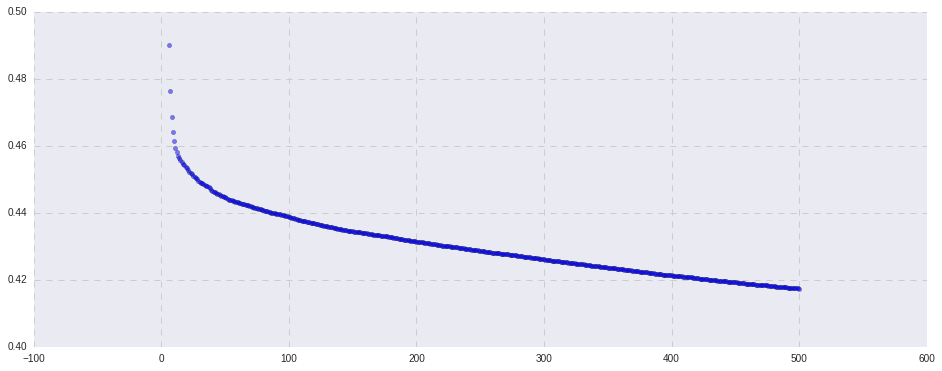

In [21]:
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('darkgrid', {'grid.color': '.8','grid.linestyle': u'--'}) 
%matplotlib inline

figsize(16, 6)
plt.scatter(model.progress['Iteration'], model.progress['Training-rmse'],alpha=.5)
plt.ylim(.4,.5)
# plt.xticks(rotation=45)

In [48]:
w = model.get_feature_importance()
w = w.add_row_number()
w

id,name,index,count
0,Cliente_ID,None,86467
1,mpca,None,78153
2,Ruta_SAK,None,63966
3,Agencia_ID,None,56860
4,Producto_ID,None,55172
5,n_c,None,53960
6,n_r,None,46064
7,lag1,None,43999
8,n_p,None,43365
9,n_a,None,38188


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

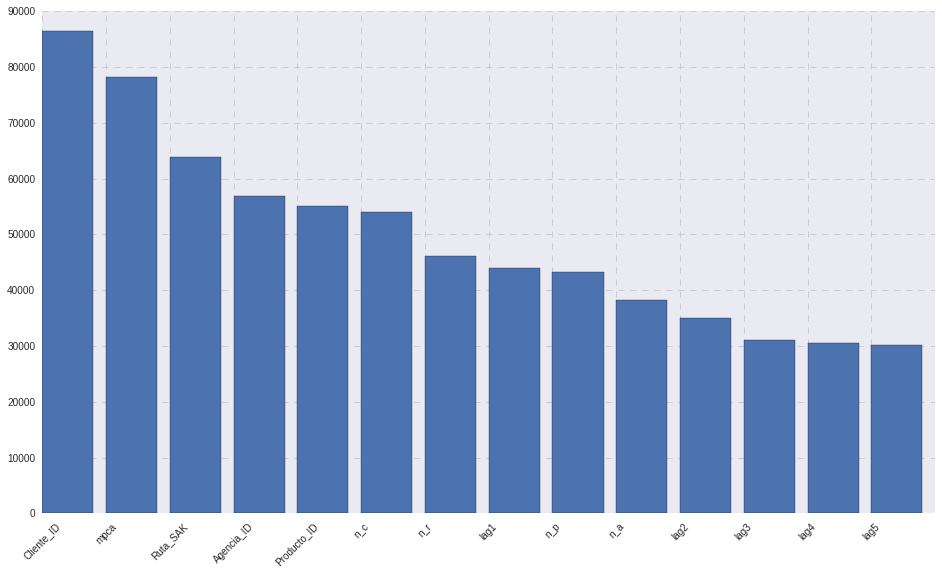

In [49]:
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('darkgrid', {'grid.color': '.8','grid.linestyle': u'--'}) 
%matplotlib inline

figsize(16, 9)
plt.bar(w['id'], w['count'], tick_label=w['name'])

plt.xticks(rotation=45)


In [20]:
# Save predictions to an SArray
predictions = model.predict(train)

# Evaluate the model and save the results into a dictionary
results = model.evaluate(train)
print results


{'max_error': 6.300516724586487, 'rmse': 0.4389403189567331}


## predict

In [53]:
'''Add feature to week 11'''
def feature_w11(test, lag_sum=0, prior_sum=0):
    test_full = test.copy()
    ids = test['id']
    del test['id']
    del test['Semana']
    demand_log = model.predict(test)
    sub1 = gl.SFrame({'id':ids,'Demanda_uni_equil':demand_log})
    test_full = test_full.join(sub1,on=['id'],how='left')
    lag11 = test_full.groupby(key_columns=['Semana','Cliente_ID','Producto_ID'], operations={'lag11':agg.MEAN('Demanda_uni_equil')})
    lag11['Semana'] = lag11['Semana'].apply(lambda x: x+1)
    test_full = test_full.join(lag11,on=['Semana','Cliente_ID','Producto_ID'],how='left')
    test_full = test_full.fillna('lag11',0)
    test_full['lag1'] = test_full['lag1'] + test_full['lag11']
    
    if lag_sum == 1:
        test_full['lag_sum'] = test_full['lag_sum'] + test_full['lag11']
        
    if prior_sum == 1:
        lag_sum11 = test_full.groupby(key_columns=['Semana','Cliente_ID','Producto_ID'], operations={'lag_sum11':agg.SUM('Demanda_uni_equil')})
        lag_sum11['Semana'] = lag_sum11['Semana'].apply(lambda x: x+1)
        test_full = test_full.join(lag_sum11,on=['Semana','Cliente_ID','Producto_ID'],how='left')
        test_full = test_full.fillna('lag_sum11',0)
        test_full['prior_sum'] = test_full['prior_sum'] + test_full['lag_sum11']
        del test_full['lag_sum11']

    del test_full['lag11']
    del test_full['Demanda_uni_equil']
    del test_full['Semana']
    return test_full

In [54]:
test = gl.SFrame.read_csv(path + 'test_lag5_w9_mean.csv', verbose=False)
# test = test.join(town, on=['Agencia_ID','Producto_ID'], how='left')
# test = test.fillna('t_c',1)
# test = test.fillna('tcc',0)
# test = test.fillna('tp_sum',0)
# del test['Town']
# del test['t_c']
# del test['n_t']

In [55]:
print test.column_names()
print len(test.column_names())

['id', 'Semana', 'Agencia_ID', 'Canal_ID', 'Ruta_SAK', 'Cliente_ID', 'Producto_ID', 'lag1', 'lag2', 'lag3', 'lag4', 'lag5', 'lag_sum', 'prior_sum', 'week_times', 'n_a', 'n_r', 'n_c', 'n_p', 'mpca']
20


In [56]:
del test['prior_sum']
del test['lag_sum']
del test['week_times']
# del test['Semana']
del test['Canal_ID']
test = test.fillna('lag1',0)
test = test.fillna('lag2',0)
test = test.fillna('lag3',0)
test = test.fillna('lag4',0)
test = test.fillna('lag5',0)
# test = test.fillna('lag_sum',0)
# test = test.fillna('prior_sum',0)
test = test.fillna('n_a',0)
test = test.fillna('n_r',0)
test = test.fillna('n_c',0)
test = test.fillna('n_p',0)


In [57]:
test_full = feature_w11(test, lag_sum=0, prior_sum=0)

In [58]:
ids = test_full['id']
del test_full['id']
# del test_full['Semana']
demand_log = model.predict(test_full)
sub = gl.SFrame({'id':ids,'Demanda_uni_equil':demand_log})

In [59]:
import math
sub['Demanda_uni_equil'] = sub['Demanda_uni_equil'].apply(lambda x: math.expm1(max(0, x)))

In [60]:
file_name = 'w9'+'_f'+str(model.num_features)+'_n'+str(model.max_iterations)+'_c'+str(model.column_subsample)
sub.save(path+file_name,format='csv')

In [37]:
sub

Demanda_uni_equil,id
1.61837256058,3462602
1.3085287952,5404948
5.9580097926,1787383
0.707530317114,6974704
1.55761237857,4537131
5.08172827211,195176
1.3427107602,1291184
2.05182806322,5641989
1.83510567121,652235
5.67998698555,1866280
